# 1. Data Source and Contents

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import re

In [2]:
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
#read the data and label it 'census'
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [0]:
variables = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']
#set the variables to include most variables (exlude 'y' and 'flag' when using loc)

x_train = census.loc[census['flag']=='train',variables]
y_train = census.loc[census['flag']=='train','y']
x_train = pd.get_dummies(x_train, columns = variables, drop_first=True)

x_test = census.loc[census['flag']=='test',variables]
y_test = census.loc[census['flag']=='test','y']
x_test = pd.get_dummies(x_test, columns = variables, drop_first=True)
#split to train/test sets and convert categorical variable to dummy variables

# 2. Finding Optimal Value of a Key Hyper-parameter

In [0]:
results = []
n_estimator = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_estimator:
  model = RandomForestClassifier(n_estimators = n, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
#set n_estimator values and a for loop model for each n instance
#the accuracy is the average results which are stored in a blank list

# 3. Building a Random Forest Model

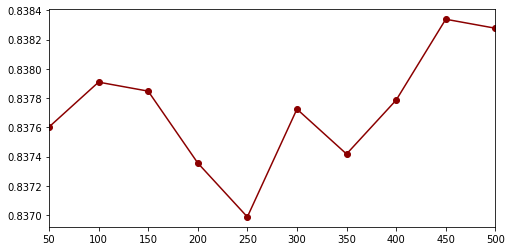

In [5]:
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color="darkred", marker="o")
#using the stored results and n_estimator as the axes, graph is plotted

In [6]:
rf_accuracy = accuracy_score(y_test, y_pred)
print(rf_accuracy)
rf_auc = roc_auc_score(y_test, y_pred)
print(rf_auc)
#print the accuracy and AUC score for the algorithm

0.8382777470671334
0.7456067024345631


# 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

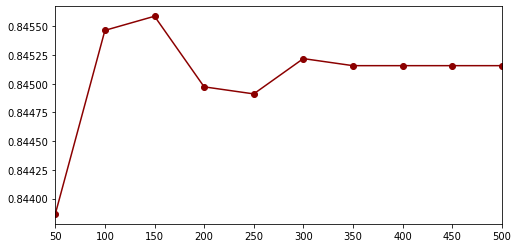

In [7]:
results = []
n_estimator = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_estimator:
  model = AdaBoostClassifier(n_estimators = n, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color="darkred", marker="o")
#repeat the steps for AdaBoost model

In [8]:
ab_accuracy = accuracy_score(y_test, y_pred)
print(ab_accuracy)
ab_auc = roc_auc_score(y_test, y_pred)
print(ab_auc)
#accuracy and AUC score printed

0.8451569313924207
0.746518275688808


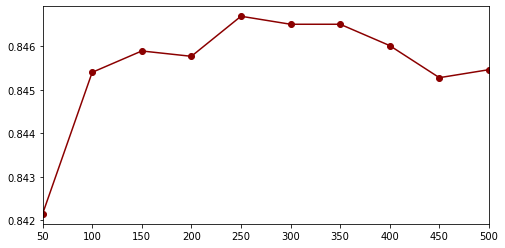

In [9]:
results = []
n_estimator = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for n in n_estimator:
  model = GradientBoostingClassifier(n_estimators = n, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color="darkred", marker="o")
#repeat the steps for Gradient Boosting model

In [10]:
gb_accuracy = accuracy_score(y_test, y_pred)
print(gb_accuracy)
gb_auc = roc_auc_score(y_test, y_pred)
print(gb_auc)
#accuracy and AUC score printed

0.8454640378355138
0.7569560780018655


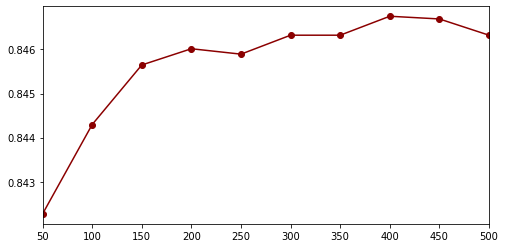

In [11]:
results = []
n_estimator = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]
#XGB does not allow special characters such as [, ] and /
#using re.compile the special characters and ignore them in n_estimator
#ignore the special characters in x_train and x_test columns

for n in n_estimator:
  model = XGBClassifier(n_estimators = n, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color="darkred", marker="o")
#repeat the steps for XGB model

In [12]:
xgb_accuracy = accuracy_score(y_test, y_pred)
print(xgb_accuracy)
xgb_auc = roc_auc_score(y_test, y_pred)
print(xgb_auc)
#accuracy and AUC score printed

0.8463239358761747
0.7585067624659148


# 5. Compare Performances

In [13]:
table = pd.read_csv('/content/performance_comparison.csv')
table.set_index('Score', inplace=True)
table.head()
#read csv file and drop index to show Accuracy and AUC table

,Random Forest,AdaBoost,Gradient Boost,XGBoost
Score,,,,
Accuracy,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN


In [0]:
table['Random Forest'] = [rf_accuracy, rf_auc]
table['AdaBoost'] = [ab_accuracy, ab_auc]
table['Gradient Boost'] = [gb_accuracy, gb_auc]
table['XGBoost'] = [xgb_accuracy, xgb_auc]
#populate table with values

In [15]:
table.head()

,Random Forest,AdaBoost,Gradient Boost,XGBoost
Score,,,,
Accuracy,0.838278,0.845157,0.845464,0.846324
AUC,0.745607,0.746518,0.756956,0.758507
